# Import Libraries and Dataset 

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Models Importing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

# For Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [5]:
data = pd.read_csv('regression.csv')
data

,Time,train v(X),train a(X),Channel 1,Channel 2,Channel 3,Channel 4,train X
0,0.000000,-0.454714,1.963586,0.026471,0.026471,0.026471,0.026471,241.159882
1,0.026471,-0.405668,1.871809,0.003965,0.010057,0.006667,0.004441,241.146545
2,0.027138,-0.404433,1.869498,0.007846,0.003048,0.001422,0.003487,241.146210
3,0.027804,-0.403198,1.867187,0.010596,0.004342,0.003526,0.005428,241.145874
4,0.028471,-0.401962,1.864875,0.000889,0.002077,0.001746,0.001384,241.145538
...,...,...,...,...,...,...,...,...
424034,279.964447,56.122330,-387.849701,0.006875,0.037238,0.013071,0.002354,259.427429
424035,279.965118,55.760689,-389.246521,0.008817,0.021545,0.008379,0.008647,259.476105
424036,279.965790,55.399048,-390.643372,0.003641,0.000297,0.005629,0.017869,259.524750
424037,279.966461,55.037407,-392.040192,0.000080,0.020845,0.007894,0.009133,259.573395


**split data into x and y**

In [9]:
x=data.iloc[:5000,1:]
y=data.iloc[:5000,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Apply ML Models

**DecisionTreeRegressor**

In [22]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
score_r2 = r2_score(y_test, y_pred_dt)
print("DesicionTreeRegressor:",score_r2)

DesicionTreeRegressor: 0.9957002347619203


**SupportVectorMachineRegressor**

In [25]:
sr=SVR()
sr.fit(X_train,y_train)
y_pred_sr=sr.predict(X_test)
score_r2_sr = r2_score(y_test, y_pred_sr)
print("SupportVectorMachineRegressor:",score_r2_sr)

SupportVectorMachineRegressor: 0.9244688582807659


In [26]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':["Model Score", "R2 Score", "MSE", "Model Accuracy"],
    'SVR ':score_r2_sr,
    'DTR':score_r2  
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# displaying the DataFrame
metrics_df.T

Metrics,Model Score,R2 Score,MSE,Model Accuracy
SVR,0.924469,0.924469,0.924469,0.924469
DTR,0.995700,0.995700,0.995700,0.995700


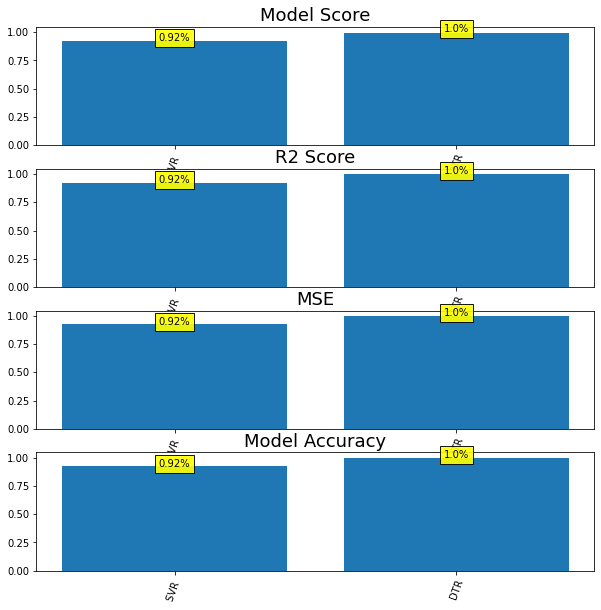

In [31]:
plt.figure(figsize = (10,10))
for n, col in enumerate(metrics_df.T.columns):
    plt.subplot(4, 1, n + 1)
    models_acc   = metrics_df.iloc[n].tolist()
    models_names = metrics_df.columns.tolist()
    plt.bar(models_names, models_acc)
    plt.xticks(rotation = 70)
    plt.title(col, fontsize=18)

    def addLabels(names,acc):
        for i in range(len(names)):
            plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

    addLabels(models_names,models_acc)